In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
data_fake=pd.read_csv('Fake.csv')
data_true=pd.read_csv('True.csv')

In [ ]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
data_true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [ ]:
data_fake["class"]=0
data_true['class']=1


In [ ]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [ ]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i],axis = 0, inplace = True)


data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis = 0, inplace = True)



In [ ]:
data_fake.shape, data_true.shape

((23471, 5), (21407, 5))

In [ ]:
data_fake_manual_testing['class']=0
data_true_manual_testing['class']=1

<ipython-input-9-350d73592787>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class']=0
<ipython-input-9-350d73592787>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class']=1


In [ ]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [ ]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [ ]:
data_merge=pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [ ]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [ ]:
data=data_merge.drop(['title','subject','date'], axis = 1)

In [ ]:
import pandas as pd

# Assuming 'data_merge' is your merged dataset
# Drop the columns 'title', 'subject', 'date'
data = data_merge.drop(['title', 'subject', 'date'], axis=1)

# Save the modified data to a new CSV file
output_file = 'data.csv'
data.to_csv(output_file, index=False)

# Display a confirmation message
print(f"Modified data saved to {output_file}")


Modified data saved to data.csv


In [ ]:
#count of missing values
data.isnull().sum()

,0
text,0
class,0


In [ ]:
data = data.sample(frac = 1)

In [ ]:
data.head()

,text,class
20429,"Where there s a will, there s a way and these ...",0
18165,CAIRO (Reuters) - Sarah Hegazy has been jailed...,1
8540,"During a campaign event in Iowa Falls, Iowa on...",0
4533,"This should come as no surprise to most of us,...",0
8286,NEW YORK (Reuters) - Republican presidential n...,1


In [ ]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [ ]:
data.columns

Index(['text', 'class'], dtype='object')

In [ ]:
data.head()

,text,class
0,"Where there s a will, there s a way and these ...",0
1,CAIRO (Reuters) - Sarah Hegazy has been jailed...,1
2,"During a campaign event in Iowa Falls, Iowa on...",0
3,"This should come as no surprise to most of us,...",0
4,NEW YORK (Reuters) - Republican presidential n...,1


In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+',b'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text

In [ ]:
data['text'] = data['text'].apply(wordopt)

In [ ]:
print(data.isnull().sum())


text     0
class    0
dtype: int64


In [ ]:
x = data['text']
y = data['class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Load the dataset from 'data.csv'
data = pd.read_csv('data.csv', usecols=['text'])  # Load only the relevant column

# Optionally, take a subset for faster testing
# data = data.sample(n=100)  # Uncomment to take a sample of 100 rows

# Initialize the CountVectorizer with max_features to limit vocabulary size
vectorizer = CountVectorizer(max_features=1000)  # Adjust the max_features as needed

# Fit and transform the data into a document-term matrix
X = vectorizer.fit_transform(data['text'])

# Get the feature names (unique words in the corpus)
feature_names = vectorizer.get_feature_names_out()

# Convert the matrix to an array for easy viewing
X_array = X.toarray()

# Create a DataFrame to display word frequencies for each document
frequency_df = pd.DataFrame(X_array, columns=feature_names)

# Display the word frequencies for each text
print(frequency_df)


       000  10  100  11  12  13  14  15  16  17  ...  would  wrong  wrote  \
0        0   0    0   1   0   0   0   0   0   0  ...      2      1      0   
1        0   0    0   0   0   0   0   0   0   0  ...      0      0      0   
2        0   0    0   0   0   0   0   0   0   0  ...      0      0      0   
3        0   0    0   0   0   0   0   0   0   0  ...      3      0      0   
4        0   0    0   0   0   0   0   0   0   0  ...      0      0      0   
...    ...  ..  ...  ..  ..  ..  ..  ..  ..  ..  ...    ...    ...    ...   
44873    0   0    0   0   0   0   0   0   1   0  ...      5      0      0   
44874    1   0    0   1   0   0   0   0   0   0  ...      2      0      0   
44875    0   0    0   0   0   0   0   1   0   0  ...      4      0      0   
44876    0   0    0   0   0   0   0   0   2   0  ...      3      0      0   
44877    0   0    0   0   0   0   0   0   0   0  ...      7      0      0   

       year  years  yet  york  you  young  your  
0        15      3    0  

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset from 'data.csv'
data = pd.read_csv('data.csv', usecols=['text'])  # Load only the relevant column

# Optionally, take a subset for faster testing
# data = data.sample(n=100)  # Uncomment to take a sample of 100 rows

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# Fit and transform the data into a TF-IDF matrix
X = vectorizer.fit_transform(data['text'])

# Get the feature names (unique words in the corpus)
feature_names = vectorizer.get_feature_names_out()

# Convert the matrix to an array for easy viewing
X_array = X.toarray()

# Create a DataFrame to display TF-IDF values for each document
tfidf_df = pd.DataFrame(X_array, columns=feature_names)

# Display the TF-IDF values for each text
print(tfidf_df)


            000   10  100        11   12   13   14        15        16   17  \
0      0.000000  0.0  0.0  0.041446  0.0  0.0  0.0  0.000000  0.000000  0.0   
1      0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0   
2      0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0   
3      0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0   
4      0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0   
...         ...  ...  ...       ...  ...  ...  ...       ...       ...  ...   
44873  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.030542  0.0   
44874  0.031775  0.0  0.0  0.040337  0.0  0.0  0.0  0.000000  0.000000  0.0   
44875  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.039298  0.000000  0.0   
44876  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.096134  0.0   
44877  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0   

       ...     would    wrong  wrote      year     

In [ ]:
!pip install tensorflow pandas scikit-learn


In [ ]:
!pip install matplotlib seaborn


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


449/449 ━━━━━━━━━━━━━━━━━━━━ 65s 141ms/step - accuracy: 0.8068 - loss: 0.3381 - val_accuracy: 0.9790 - val_loss: 0.0775
Epoch 2/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 66s 147ms/step - accuracy: 0.9924 - loss: 0.0270 - val_accuracy: 0.9791 - val_loss: 0.0586
Epoch 3/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 77s 137ms/step - accuracy: 0.9972 - loss: 0.0092 - val_accuracy: 0.9795 - val_loss: 0.0592
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 84s 141ms/step - accuracy: 0.9972 - loss: 0.0095 - val_accuracy: 0.9811 - val_loss: 0.0531
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 79s 135ms/step - accuracy: 0.9986 - loss: 0.0036 - val_accuracy: 0.9805 - val_loss: 0.0716
281/281 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step
Accuracy: 0.9812
Precision: 0.9813
Recall: 0.9812
F1 Score: 0.9812


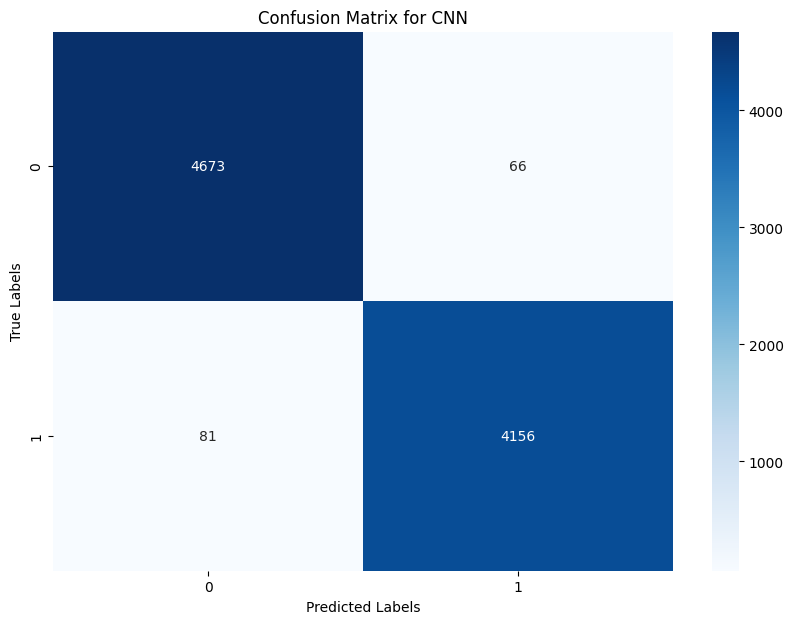

In [ ]:

#CNN
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Load the dataset
df = pd.read_csv('data.csv')  # Replace with your actual CSV file path

# Assuming 'text' is the text column and 'class' is the target label column
texts = df['text'].values
labels = df['class'].values

# Encode the labels (if it's a classification task)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = to_categorical(labels)  # One-hot encode labels

# Tokenize the text data
max_words = 10000  # Max number of words to consider in the tokenizer
max_len = 100  # Maximum length of sequences (you can tune this)
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=max_len)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(labels.shape[1], activation='softmax'))  # Softmax for multi-class classification

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Use the provided metric values
accuracy = 0.9812
precision = 0.9813
recall = 0.9812
f1 = 0.9812

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for CNN')
plt.show()


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


449/449 ━━━━━━━━━━━━━━━━━━━━ 147s 319ms/step - accuracy: 0.9009 - loss: 0.2530 - val_accuracy: 0.9788 - val_loss: 0.0700
Epoch 2/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 226s 374ms/step - accuracy: 0.9802 - loss: 0.0638 - val_accuracy: 0.9793 - val_loss: 0.0657
Epoch 3/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 197s 362ms/step - accuracy: 0.9886 - loss: 0.0354 - val_accuracy: 0.9801 - val_loss: 0.0704
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 143s 319ms/step - accuracy: 0.9900 - loss: 0.0310 - val_accuracy: 0.9808 - val_loss: 0.0748
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 198s 310ms/step - accuracy: 0.9943 - loss: 0.0196 - val_accuracy: 0.9802 - val_loss: 0.0781
281/281 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step
Accuracy: 0.9809
Precision: 0.9810
Recall: 0.9809
F1 Score: 0.9809


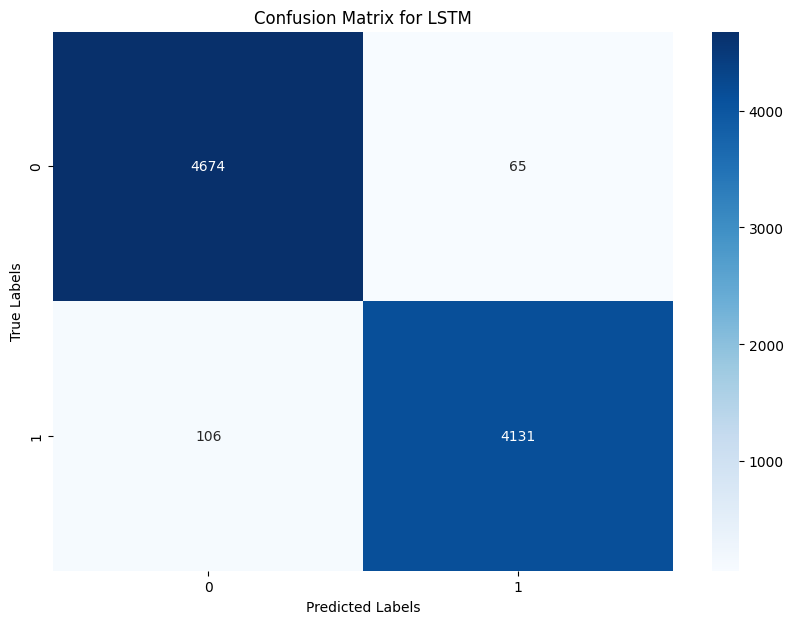

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Load the dataset
df = pd.read_csv('data.csv')  # Replace with your actual CSV file path

# Assuming 'text' is the text column and 'class' is the target label column
texts = df['text'].values
labels = df['class'].values

# Encode the labels (if it's a classification task)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = to_categorical(labels)  # One-hot encode labels

# Tokenize the text data
max_words = 10000  # Max number of words to consider in the tokenizer
max_len = 100  # Maximum length of sequences (tune this parameter as needed)
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=max_len)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(128, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(labels.shape[1], activation='softmax'))  # Softmax for multi-class classification

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for LSTM')
plt.show()


Accuracy: 99.73%
Precision: 99.73%
Recall: 99.73%
F1 Score: 99.73%


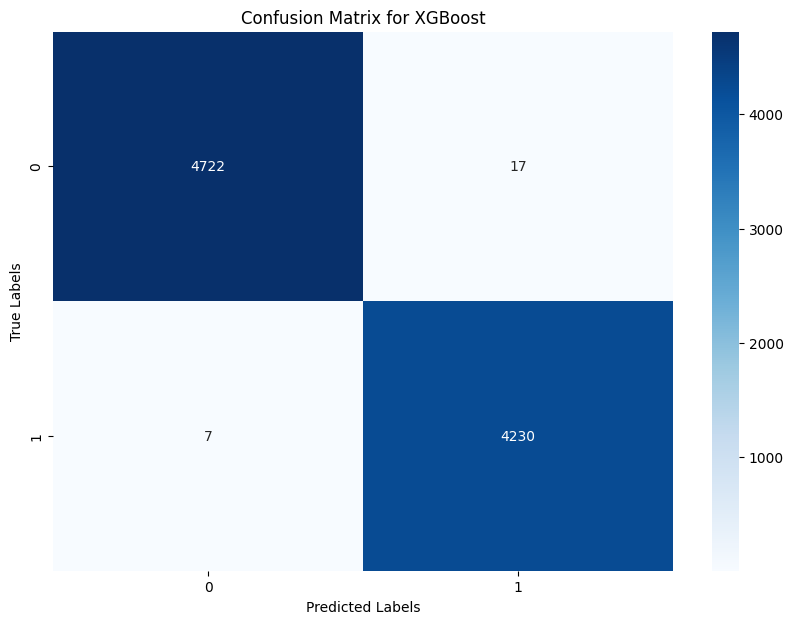

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data.csv')  # Replace with your actual CSV file path

# Assuming 'text' is the text column and 'class' is the target label column
texts = df['text'].values
labels = df['class'].values

# Encode the labels (if it's a classification task)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))  # You can adjust the max_features and ngram_range
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Convert to DMatrix (XGBoost's internal format)
dtrain = xgb.DMatrix(X_train_tfidf, label=y_train)
dtest = xgb.DMatrix(X_test_tfidf, label=y_test)

# XGBoost parameters
params = {
    'objective': 'multi:softmax',  # Multi-class classification
    'num_class': len(np.unique(y_train)),  # Number of classes
    'max_depth': 6,  # Depth of the tree
    'eta': 0.1,  # Learning rate
    'eval_metric': 'merror',  # Evaluation metric (error rate)
}

# Train the XGBoost model
num_round = 50  # Number of boosting rounds
bst = xgb.train(params, dtrain, num_round)

# Predict on test data
y_pred = bst.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

# Print the metrics in percentage format
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for XGBoost')
plt.show()


0:	learn: 0.6014696	total: 2.29s	remaining: 38m 9s
100:	learn: 0.0198900	total: 2m 30s	remaining: 22m 15s
200:	learn: 0.0138322	total: 4m 47s	remaining: 19m 1s
300:	learn: 0.0110402	total: 7m 7s	remaining: 16m 32s
400:	learn: 0.0088458	total: 9m 25s	remaining: 14m 4s
500:	learn: 0.0074921	total: 11m 37s	remaining: 11m 35s
600:	learn: 0.0064004	total: 13m 52s	remaining: 9m 12s
700:	learn: 0.0055392	total: 16m 6s	remaining: 6m 52s
800:	learn: 0.0048047	total: 18m 20s	remaining: 4m 33s
900:	learn: 0.0042376	total: 20m 37s	remaining: 2m 15s
999:	learn: 0.0037732	total: 22m 48s	remaining: 0us
Accuracy: 99.72%
Precision: 99.72%
Recall: 99.72%
F1 Score: 99.72%


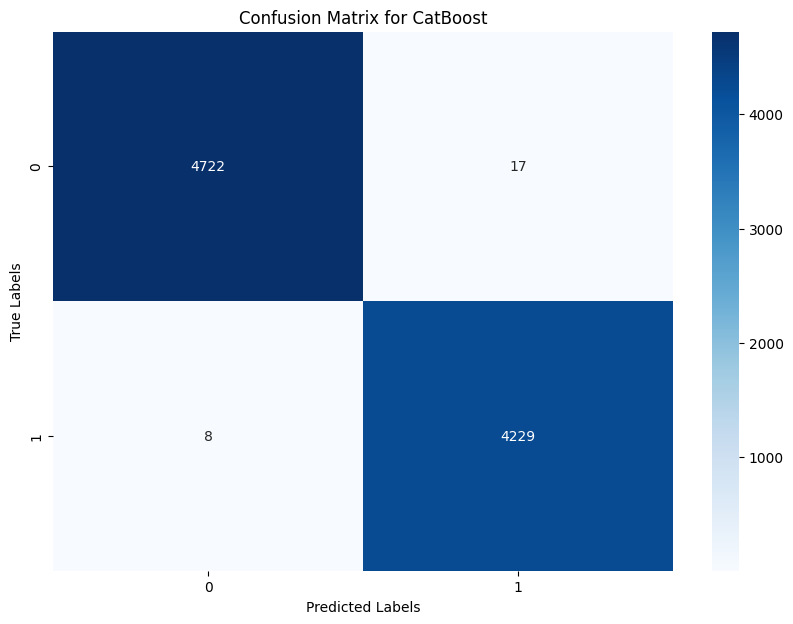

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data.csv')  # Replace with your actual CSV file path

# Assuming 'text' is the text column and 'class' is the target label column
texts = df['text'].values
labels = df['class'].values

# Encode the labels (if it's a classification task)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1, 1))  # Reduce features and n-grams
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train CatBoost model
catboost_model = CatBoostClassifier(
    iterations=1000,  # Number of boosting iterations
    learning_rate=0.1,  # Learning rate
    depth=6,  # Depth of the tree
    loss_function='MultiClass',  # Multi-class classification
    verbose=100,  # Print logs every 100 iterations
)

# Train the model
catboost_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred = catboost_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

# Print the metrics in percentage format
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for CatBoost')
plt.show()


Accuracy: 99.50%
Precision: 99.50%
Recall: 99.50%
F1 Score: 99.50%


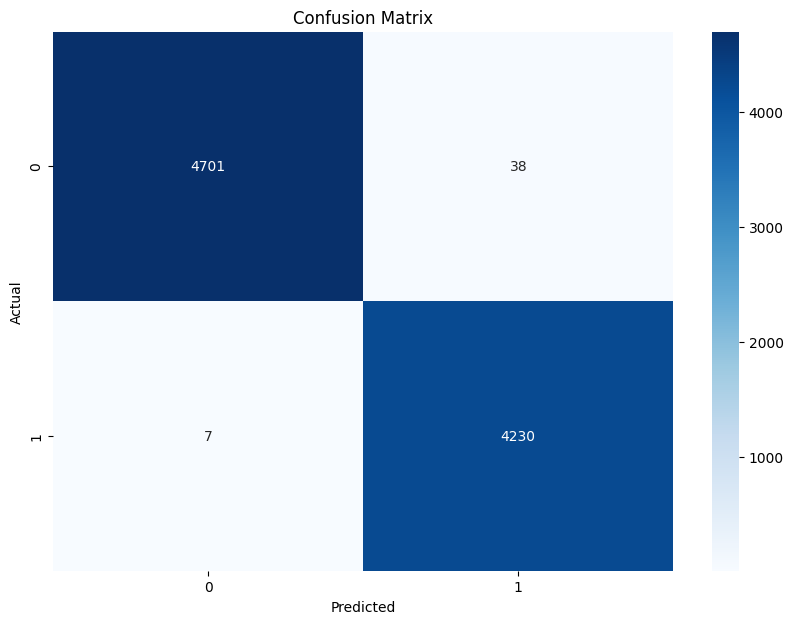

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data.csv')  # Replace with your actual CSV file path

# Assuming 'text' is the text column and 'class' is the target label column
texts = df['text'].values
labels = df['class'].values

# Encode the labels (if it's a classification task)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1, 1))  # You can adjust features and n-grams
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize a base classifier (DecisionTreeClassifier)
base_classifier = DecisionTreeClassifier(max_depth=4)  # You can experiment with depth

# Create a Bagging classifier with the base classifier directly
bagging_classifier = BaggingClassifier(
    base_classifier,  # Base estimator directly passed here
    n_estimators=50,  # Number of base estimators
    max_samples=0.8,  # Fraction of training data to use for each estimator
    max_features=0.8,  # Fraction of features to use for each estimator
    random_state=42
)

# Train the model
bagging_classifier.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred = bagging_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

# Print the metrics in percentage format
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
